# Regression problem: Alcohol Effect on Courses Grades

Course: FUNDAMENTOS DE APRENDIZAGEM AUTOMÁTICA (FAA)

Group members:
* Stefano Petrina, 112056
* Stanisław Franczyk, 112059
    
Data source:
* https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study


### PROJECT GOALS
The goal of this project is to apply suitable machine learning algorithms learned in class or self-learned
to solve a specific data science problem (classification, regression, clustering). Represent the results in
graphical/table formats and make analysis and conclusions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("clean_data/maths.csv")

data.shape

(395, 33)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### G3 dependence on age

Text(0.5, 1.0, 'Last grade Prediction')

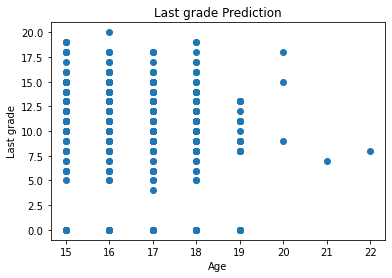

In [7]:
plt.scatter(data["age"], data["G3"])
plt.xlabel("Age")
plt.ylabel("Last grade")
plt.title("Last grade Prediction")

Text(0.5, 1.0, 'Last grade Prediction')

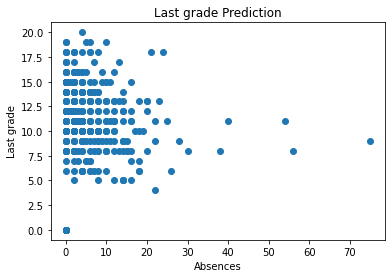

In [8]:
plt.scatter(data["absences"], data["G3"])
plt.xlabel("Absences")
plt.ylabel("Last grade")
plt.title("Last grade Prediction")

## Problem formulation

Given datas content a lot of variables. Problem kind: Multivariable Linear Regression

In [9]:
def features_string_to_numeric(data):
    """
    Changes columns with string data to numeric data by creating a new column for each new string in the column.
        Case of new column name: {column name}_{string data}
    """
    df = data.copy()
    columns = df.select_dtypes('object')
    le = LabelEncoder()
    
    binary_columns = []
    for c in columns:
        if len(df[c].unique()) == 2:
            df[c] = le.fit_transform(df[c])
            binary_columns.append(c)
    columns.drop(binary_columns, axis=1, inplace=True)

    df1 = pd.get_dummies(columns, prefix=columns.columns)
    df = pd.concat([df, df1], axis=1).reindex(df.index)

    df.drop(columns.columns, axis=1, inplace=True)
        
    return df

In [10]:
def corr_column(data, col_name):
    """
    Gives a list of correlations by given column name
    """
    return data.corr()[col_name]

In [11]:
df1 = features_string_to_numeric(data)

n=corr_column(df1, 'G3').sort_values(key = lambda a: -a.abs())

print(n)
print(n[3:13].axes)

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures            -0.360415
Medu                 0.217147
higher               0.182465
age                 -0.161579
Fedu                 0.152457
goout               -0.132791
romantic            -0.129970
traveltime          -0.117142
Mjob_health          0.116158
Mjob_at_home        -0.115634
address              0.105756
sex                  0.103456
paid                 0.101996
reason_course       -0.098950
internet             0.098483
studytime            0.097820
Mjob_other          -0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other      -0.087774
schoolsup           -0.082788
famsize              0.081407
Mjob_services        0.078429
health              -0.061335
Pstatus             -0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                -0.054660
Fjob_other          -0.053483
reason_other         0.052008
Walc      

In [12]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [13]:
df1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0
394,1,1,19,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0


In [14]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """

    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm, mean, std

def computeCost(X, y, theta):
    """
    Take the numpy arrays X, y, theta and return the cost function J for this theta. 
    """

    m = len(y)
    h = np.dot(X, theta)
    J = 1 / (2 * m) * np.sum((h - y)**2)

    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Take numpy arrays X, y and theta and update theta by taking num_iters gradient steps with learning rate alpha
    
     Return: theta and the list of the cost of theta (J_history) during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        h = np.dot(X, theta)
        grad = np.dot(X.transpose(), (h - y))
        theta= theta - alpha * (1 / m) * grad
        
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

def predict(x, theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    h = np.dot(x, theta)
    
    return h

In [15]:
def drop_features_get_xy(data, col_drop, col_y):
    data2 = data.drop(col_drop, axis=1)
    data2 = features_string_to_numeric(data2)
    
    y_df = data2[col_y]
    X_df = data2.drop([col_y], axis=1)
    return X_df.values, y_df.values, X_df

In [16]:
def take_features_get_xy(data, col_take, col_y):
    data2 = data[col_take]
    data2 = features_string_to_numeric(data2)
    
    y_df = data[col_y]
    return data2.values, y_df.values, data2

In [17]:
def split_train_test(data, a, b):
    x_train1 = data[ :a, :]
    x_test   = data[a:b, :]
    x_train2 = data[b: , :]
    
    x_train = np.vstack((x_train1, x_train2))
    
    return x_train, x_test

In [18]:
def Kfold(X, y, alpha, K=10, iteration_number=400):
    """
    Divide the data to do the K-fold
    compute the gradient descent of each fold using gradientDescent
    use computeCost for each fold
    RETURN: average of all the compute costs
    """
    
    elements = int(X.shape[0] / K)
    comp = 0
    
    for i in range(0, K):
        theta = np.zeros((n,1))
        
        split_index1 = i * elements
        split_index2 = split_index1 + elements
        
        X_train, X_test = split_train_test(X, split_index1, split_index2)
        y_train, y_test = split_train_test(y, split_index1, split_index2)
    
        theta, J_history = gradientDescent(X_train, y_train, theta, alpha, iteration_number)
        
        comp += computeCost(X_test, y_test, theta)

    return comp / K

In [19]:
# Different alpha
alphaList=[0.001, 0.01, 0.1, 0.3]

In [20]:
#Choose alpha from alphaList
alpha=alphaList[3]

#Select the parameters to drop
col_drop, col_y = ['G1', 'G2'], 'G3' # All features
'''
#10 best features
col_drop, col_y=['school','sex','famsize','Pstatus','Fjob','reason','guardian','studytime','schoolsup','famsup','paid','activities','nursery','internet','famrel','freetime', 'Dalc','Walc','health','absences','G1','G2'], 'G3'
'''
X, y, X_df = drop_features_get_xy(data, col_drop, col_y)

m = len(y)
n = X.shape[1] + 1

X, mean_X, std_X = featureNormalization(X)
X = np.append(np.ones((m, 1)), X, axis=1)

y = y.reshape(m, 1)

# Compute cost 
c=Kfold(X, y, alpha)

print("alpha = ", alpha)
print('Compute cost = ', c)

# Print h(x)
theta2 = np.zeros((n, 1))
theta2, J_history2 = gradientDescent(X, y, theta2, alpha, 400)
s = "h(x) = " + str(round(theta2[0, 0], 2))
for i in range(1, n - 1):
    s += f'{str(round(theta2[i, 0], 2))}x{i} + '
print(s + f'{str(round(theta2[i, 0], 2))}x{i}')

alpha =  0.3
Compute cost =  10.067349751452074
h(x) = 10.420.23x1 + 0.63x2 + -0.48x3 + 0.23x4 + 0.32x5 + -0.1x6 + 0.5x7 + -0.11x8 + -0.17x9 + 0.46x10 + -1.28x11 + -0.45x12 + -0.42x13 + 0.17x14 + -0.16x15 + -0.07x16 + 0.3x17 + 0.19x18 + -0.52x19 + 0.21x20 + 0.3x21 + -0.66x22 + -0.24x23 + 0.34x24 + -0.25x25 + 0.45x26 + 0.02x27 + 0.29x28 + -0.15x29 + 0.31x30 + -0.42x31 + 0.05x32 + 0.12x33 + -0.19x34 + -0.1x35 + 0.41x36 + -0.14x37 + -0.09x38 + 0.14x39 + 0.15x40 + -0.06x41 + -0.04x42 + -0.04x42


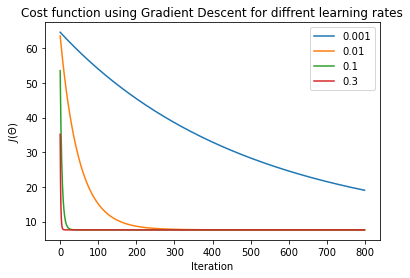

In [21]:
J_history2 = []

for a in alphaList:
    theta2 = np.zeros((n,1))
    theta2, J_history_aux = gradientDescent(X, y, theta2, a, 800)
    J_history2.append(J_history_aux)
    
y_axis = [*range(800)]

for a in alphaList:
    theta2 = np.zeros((n,1))
    theta2, J_history2 = gradientDescent(X, y, theta2, a, 800)
    plt.plot(y_axis, J_history2, label=a)
    
plt.title("Cost function using Gradient Descent for diffrent learning rates")
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()

In [22]:
theta2 = np.zeros((n, 1))
theta2, J_history2 = gradientDescent(X, y, theta2, 0.1, 400)


# Here all test samples without dropped columns and y column
x_samples = [
    ['GP','F',18,'U','GT3','A',4,4,'at_home','teacher','course','father',2,2,0,'yes','no','no','no','yes','yes','no','no',4,3,4,1,3,3,5],
    ['MS','F',18,'U','GT3','A',4,4,'at_home','teacher','course','mother',2,2,0,'yes','no','yes','no','yes','yes','no','no',4,3,4,1,3,3,5]
]


m_sample = len(x_samples)

columns_name = list(filter(lambda c: c not in col_drop and c != col_y, data.columns))

x_samples_df = pd.DataFrame(x_samples, columns=columns_name)
x_samples_df = features_string_to_numeric(x_samples_df)

for i, c in enumerate(X_df.columns):
    if c not in x_samples_df:
        x_samples_df[c] = np.zeros(m_sample)
        
x_samples = x_samples_df[X_df.columns].values


x_samples = (x_samples - mean_X) / std_X

x_samples = np.append(np.ones((m_sample, 1)), x_samples, axis=1)

predict1 = predict(x_samples, theta2)
for i, p in enumerate(predict1):
    print(f'For x_sample_{i} G3 = {str(round(p[0], 0))}')

For x_sample_0 G3 = 11.0
For x_sample_1 G3 = 12.0


In [23]:
data = pd.read_csv("clean_data/maths.csv")

col_y = 'G3'

col_drop, col_y = ['G1', 'G2'], 'G3' # All features

# all
X_all, y, X_df = drop_features_get_xy(data, col_drop, col_y)

# 10 top
top_10= ['failures', 'Medu', 'higher', 'age', 'Fedu', 'goout', 'romantic', 'traveltime', 'Mjob', 'address']
X_top10, y, X_df = take_features_get_xy(data, top_10, col_y)

# selected
# selected = ['internet', 'romantic', 'famrel',
#             'freetime', 'goout', 'Dalc', 'Walc', 'health']
# X_selected, y, X_df = take_features_get_xy(data, selected, col_y)

X_list = [X_all, X_top10]

#####################################
##############  MATH  ###############
#####################################
(395, 44)
alpha: 0.005, mean_error: 18.1586
alpha: 0.01, mean_error: 12.5738
alpha: 0.012, mean_error: 11.9432
alpha: 0.014, mean_error: 11.5469
alpha: 0.016, mean_error: 11.2694
alpha: 0.018, mean_error: 11.0595
alpha: 0.1, mean_error: 10.0492
alpha: 0.2, mean_error: 10.0667
alpha: 0.3, mean_error: 10.0673
Best alpha: 0.1, cost: 10.049244695743795


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


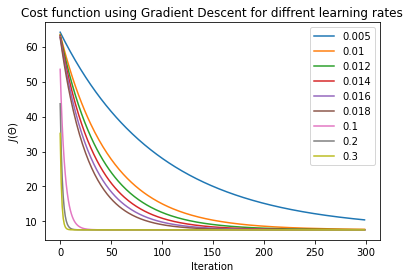

(395, 15)
alpha: 0.005, mean_error: 12.9262
alpha: 0.01, mean_error: 9.4852
alpha: 0.012, mean_error: 9.3323
alpha: 0.014, mean_error: 9.2892
alpha: 0.016, mean_error: 9.2824
alpha: 0.018, mean_error: 9.2865
alpha: 0.1, mean_error: 9.3213


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


alpha: 0.2, mean_error: 9.3213
alpha: 0.3, mean_error: 9.3213
Best alpha: 0.016, cost: 9.282356952039596


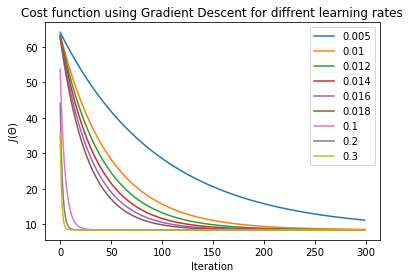

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


$h(x) = 10.420.23 \cdot x_{1} + 0.63 \cdot x_{2} + -0.48 \cdot x_{3} + 0.23 \cdot x_{4} + 0.32 \cdot x_{5} + -0.1 \cdot x_{6} + 0.5 \cdot x_{7} + -0.11 \cdot x_{8} + -0.17 \cdot x_{9} + 0.46 \cdot x_{10} + -1.28 \cdot x_{11} + -0.45 \cdot x_{12} + -0.42 \cdot x_{13} + 0.17 \cdot x_{14} + -0.16 \cdot x_{15} + -0.07 \cdot x_{16} + 0.3 \cdot x_{17} + 0.19 \cdot x_{18} + -0.52 \cdot x_{19} + 0.21 \cdot x_{20} + 0.3 \cdot x_{21} + -0.66 \cdot x_{22} + -0.24 \cdot x_{23} + 0.34 \cdot x_{24} + -0.25 \cdot x_{25} + 0.45 \cdot x_{26} + 0.02 \cdot x_{27} + 0.29 \cdot x_{28} + -0.15 \cdot x_{29} + 0.31 \cdot x_{30} + -0.42 \cdot x_{31} + 0.05 \cdot x_{32} + 0.12 \cdot x_{33} + -0.19 \cdot x_{34} + -0.1 \cdot x_{35} + 0.41 \cdot x_{36} + -0.14 \cdot x_{37} + -0.09 \cdot x_{38} + 0.14 \cdot x_{39} + 0.15 \cdot x_{40} + -0.06 \cdot x_{41} + -0.04 \cdot x_{42}$
$h(x) = 10.42-1.34 \cdot x_{1} + 0.5 \cdot x_{2} + 0.23 \cdot x_{3} + -0.09 \cdot x_{4} + -0.05 \cdot x_{5} + -0.49 \cdot x_{6} + -0.43 \cdot

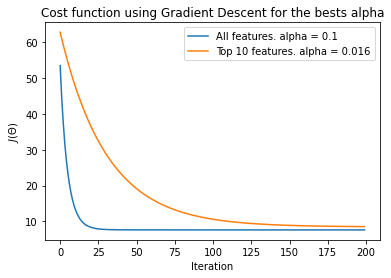

In [24]:
############ MATH ##################


print("#####################################")
print("##############  MATH  ###############")
print("#####################################")


alphaList=[0.005, 0.01, 0.012, 0.014, 0.016, 0.018, 0.1, 0.2, 0.3]
iterations = 300
best_alphas = []
best_J_historys = []
best_thetas = []
for i, x in enumerate(X_list):
    J_history2 = []
    
    m = x.shape[0]
    
    x, mean_X, std_X = featureNormalization(x)
    x = np.append(np.ones((m, 1)), x, axis=1)

    y = y.reshape(m, 1)
    
    n = x.shape[1]

    y_axis = [*range(iterations)]
    
    best_alpha = alphaList[0]
    best_J_history = []
    min_cost = float('inf')
    best_theta = []
    
    print(x.shape)

    for a in alphaList:
        theta2 = np.zeros((n,1))
        theta2, J_history2 = gradientDescent(x, y, theta2, a, iterations)
        
        c = Kfold(x, y, a, 10, iterations)
        print(f'alpha: {a}, mean_error: {round(c, 4)}')
        
        if c < min_cost:
            min_cost = c
            best_alpha = a
            best_J_history = J_history2
            best_theta = theta2.copy()
        
        plt.plot(y_axis, J_history2, label=a)
    
    best_alphas.append(best_alpha)
    best_J_historys.append(best_J_history)
    best_thetas.append(best_theta)
    
    print(f'Best alpha: {best_alpha}, cost: {min_cost}')
    
    plt.xlabel("Iteration")
    plt.ylabel("$J(\Theta)$")
    plt.legend()
    plt.savefig(f'plots/maths_{i}.eps', format='eps', dpi=1200)
    
    plt.title("Cost function using Gradient Descent for diffrent learning rates")
    plt.show()
    
    
s = "$h(x) = " + str(round(best_thetas[0][0, 0], 2))
for i in range(1, X_list[0].shape[1] - 1):
    s += str(round(best_thetas[0][i, 0], 2)) + ' \cdot x_{' + str(i) + '} + '
print(s + f'{str(round(best_thetas[0][1+i, 0], 2))}' + ' \cdot x_{' + str(1+i) + '}$')

s = "$h(x) = " + str(round(best_thetas[0][0, 0], 2))
for i in range(1, X_list[1].shape[1] - 1):
    s += str(round(best_thetas[1][i, 0], 2)) + ' \cdot x_{' + str(i) + '} + '
print(s + f'{str(round(best_thetas[0][1+i, 0], 2))}' + ' \cdot x_{' + str(1+i) + '}$')

plt.plot(y_axis[:200], best_J_historys[0][:200], label=f'All features. alpha = {best_alphas[0]}')
plt.plot(y_axis[:200], best_J_historys[1][:200], label=f'Top 10 features. alpha = {best_alphas[1]}')

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.savefig(f'plots/maths_{3}.eps', format='eps', dpi=1200)
plt.title("Cost function using Gradient Descent for the bests alpha")
plt.show()


In [25]:
data = pd.read_csv("clean_data/portuguese.csv")

col_y = 'G3'

col_drop, col_y = ['G1', 'G2'], 'G3' # All features

# all
X_all, y, X_df = drop_features_get_xy(data, col_drop, col_y)

# 10 top
top_10= ['failures', 'higher', 'school', 'studytime', 'Medu', 'Fedu', 'Dalc', 'Walc', 'reason', 'address', 'internet']
X_top10, y, X_df = take_features_get_xy(data, top_10, col_y)

# selected
# selected = ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
#             'freetime', 'goout', 'Dalc', 'Walc', 'health']
# X_selected, y, X_df = take_features_get_xy(data, selected, col_y)

X_list = [X_all, X_top10]

#####################################
###########  PORTUGUESE  ############
#####################################
alpha: 0.005, mean_error: 10.6939
alpha: 0.01, mean_error: 4.5815
alpha: 0.012, mean_error: 4.1968
alpha: 0.014, mean_error: 4.0423
alpha: 0.016, mean_error: 3.9788
alpha: 0.18, mean_error: 3.9347
alpha: 0.1, mean_error: 3.9347
alpha: 0.2, mean_error: 3.9347
alpha: 0.3, mean_error: 3.9347


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best alpha: 0.1, cost: 3.9347113560136613


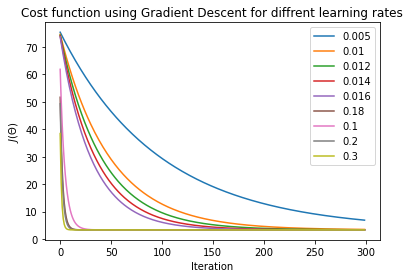

alpha: 0.005, mean_error: 9.0062
alpha: 0.01, mean_error: 4.2595
alpha: 0.012, mean_error: 4.0234
alpha: 0.014, mean_error: 3.938
alpha: 0.016, mean_error: 3.9057
alpha: 0.18, mean_error: 3.8782
alpha: 0.1, mean_error: 3.8782
alpha: 0.2, mean_error: 3.8782


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


alpha: 0.3, mean_error: 3.8782
Best alpha: 0.3, cost: 3.878221224885486


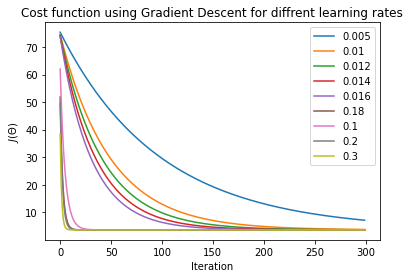

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


$h(x) = 11.91-0.57 \cdot x_{1} + -0.31 \cdot x_{2} + 0.19 \cdot x_{3} + 0.15 \cdot x_{4} + 0.14 \cdot x_{5} + 0.06 \cdot x_{6} + 0.04 \cdot x_{7} + 0.18 \cdot x_{8} + 0.05 \cdot x_{9} + 0.34 \cdot x_{10} + -0.84 \cdot x_{11} + -0.4 \cdot x_{12} + -0.01 \cdot x_{13} + -0.09 \cdot x_{14} + 0.11 \cdot x_{15} + -0.09 \cdot x_{16} + 0.53 \cdot x_{17} + 0.11 \cdot x_{18} + -0.21 \cdot x_{19} + 0.15 \cdot x_{20} + -0.14 \cdot x_{21} + -0.08 \cdot x_{22} + -0.19 \cdot x_{23} + -0.1 \cdot x_{24} + -0.27 \cdot x_{25} + -0.18 \cdot x_{26} + -0.11 \cdot x_{27} + 0.17 \cdot x_{28} + -0.1 \cdot x_{29} + 0.06 \cdot x_{30} + 0.08 \cdot x_{31} + 0.07 \cdot x_{32} + -0.06 \cdot x_{33} + 0.05 \cdot x_{34} + -0.16 \cdot x_{35} + 0.2 \cdot x_{36} + -0.0 \cdot x_{37} + 0.02 \cdot x_{38} + -0.14 \cdot x_{39} + 0.09 \cdot x_{40} + 0.06 \cdot x_{41} + -0.09 \cdot x_{42}$
$h(x) = 11.91-0.87 \cdot x_{1} + 0.51 \cdot x_{2} + -0.46 \cdot x_{3} + 0.36 \cdot x_{4} + 0.16 \cdot x_{5} + 0.17 \cdot x_{6} + -0.27 \cdot 

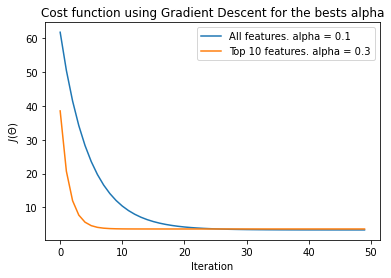

In [26]:
############ PORTUGUESE ##################

print("#####################################")
print("###########  PORTUGUESE  ############")
print("#####################################")

alphaList=[0.005, 0.01, 0.012, 0.014, 0.016, 0.18, 0.1, 0.2, 0.3]
iterations = 300
best_alphas = []
best_J_historys = []
best_thetas = []
for i, x in enumerate(X_list):
    J_history2 = []
    
    m = x.shape[0]
    
    x, mean_X, std_X = featureNormalization(x)
    x = np.append(np.ones((m, 1)), x, axis=1)

    y = y.reshape(m, 1)
    
    n = x.shape[1]

    y_axis = [*range(iterations)]
    
    best_alpha = alphaList[0]
    best_J_history = []
    min_cost = float('inf')
    best_theta = []

    for a in alphaList:
        theta2 = np.zeros((n,1))
        theta2, J_history2 = gradientDescent(x, y, theta2, a, iterations)
        
        c = Kfold(x, y, a, 10, iterations)
        print(f'alpha: {a}, mean_error: {round(c, 4)}')
        
        if c < min_cost:
            min_cost = c
            best_alpha = a
            best_J_history = J_history2
            best_theta = theta2.copy()
        
        plt.plot(y_axis, J_history2, label=a)
    
    best_alphas.append(best_alpha)
    best_J_historys.append(best_J_history)
    best_thetas.append(best_theta)
    
    print(f'Best alpha: {best_alpha}, cost: {min_cost}')
    
    plt.xlabel("Iteration")
    plt.ylabel("$J(\Theta)$")
    plt.legend()
    plt.savefig(f'plots/maths_{i}.eps', format='eps', dpi=1200)
    
    plt.title("Cost function using Gradient Descent for diffrent learning rates")
    plt.show()
    
    
s = "$h(x) = " + str(round(best_thetas[0][0, 0], 2))
for i in range(1, X_list[0].shape[1] - 1):
    s += str(round(best_thetas[0][i, 0], 2)) + ' \cdot x_{' + str(i) + '} + '
print(s + f'{str(round(best_thetas[0][1+i, 0], 2))}' + ' \cdot x_{' + str(1+i) + '}$')

s = "$h(x) = " + str(round(best_thetas[0][0, 0], 2))
for i in range(1, X_list[1].shape[1] - 1):
    s += str(round(best_thetas[1][i, 0], 2)) + ' \cdot x_{' + str(i) + '} + '
print(s + f'{str(round(best_thetas[0][1+i, 0], 2))}' + ' \cdot x_{' + str(1+i) + '}$')

plt.plot(y_axis[:50], best_J_historys[0][:50], label=f'All features. alpha = {best_alphas[0]}')
plt.plot(y_axis[:50], best_J_historys[1][:50], label=f'Top 10 features. alpha = {best_alphas[1]}')

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()

plt.savefig(f'plots/portuguese_{3}.eps', format='eps', dpi=1200)
plt.title("Cost function using Gradient Descent for the bests alpha")
plt.show()